<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/OilSG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#load dataset
# X: Input features
# y: Target values

df = pd.read_excel('oil SG.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       458 non-null    float64
 1   P       392 non-null    float64
 2   Sgo     480 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB


In [ ]:
df.head()

,T,P,Sgo
0,240.0,1439.07588,0.727671
1,240.0,1523.00000,0.728360
2,240.0,1623.00000,0.729221
3,240.0,1723.00000,0.730069
4,240.0,1823.00000,0.730905


In [ ]:
df['P'] = df['P'].fillna(df['P'].mean())

In [ ]:
df['T'] = df['T'].fillna(df['T'].mean())

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       480 non-null    float64
 1   P       480 non-null    float64
 2   Sgo     480 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sgo', axis=1), df['Sgo'], test_size=0.2, random_state=42)

In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(384, 2)

In [ ]:
y_train.shape

(384,)

In [ ]:
X_train.shape[0] , X_train.shape[1]

(384, 2)

In [ ]:
# Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')  # Single output neuron for regression
])

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 0.5807 - val_loss: 0.4306
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3876 - val_loss: 0.3094
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2927 - val_loss: 0.2425
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2328 - val_loss: 0.1994
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1868 - val_loss: 0.1576
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1429 - val_loss: 0.1181
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1031 - val_loss: 0.0818
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0694 - val_loss: 0.0535
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0431 - val_loss: 0.0313
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0237 - val_loss: 0.0165
Epoch 11

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", loss)

3/3 - 0s - loss: 0.0021 - 139ms/epoch - 46ms/step
Test loss: 0.0020845280960202217


In [ ]:
# Make predictions
predictions = model.predict(X_test, verbose=2)

3/3 - 1s - 847ms/epoch - 282ms/step


In [ ]:
# acc
from sklearn.metrics import mean_absolute_error , mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

0.002084528180557169

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mae

0.03686120634905047

In [ ]:
rmse = mean_squared_error(y_test, predictions, squared =False)
rmse

0.0456566334781395

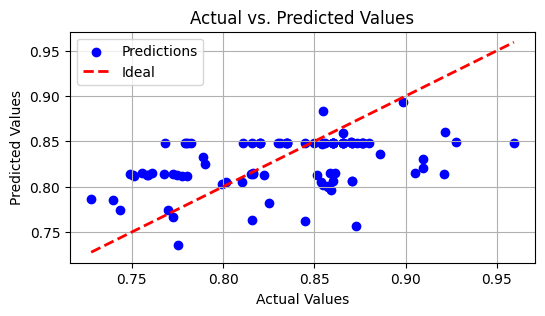

In [ ]:
# visualization
import numpy as np
import matplotlib.pyplot as plt

# Plotting the actual test data and predictions
plt.figure(figsize=(6,3))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install pygad

15/15 [==============================] - 0s 1ms/step
Generation = 1
15/15 [==============================] - 0s 2ms/step
Fitness    = 1.1981363013325284
15/15 [==============================] - 0s 2ms/step
Generation = 2
15/15 [==============================] - 0s 3ms/step
Fitness    = 1.1981363013325284
15/15 [==============================] - 0s 3ms/step
Generation = 3
15/15 [==============================] - 0s 5ms/step
Fitness    = 1.1981363013325284
15/15 [==============================] - 0s 3ms/step
Generation = 4
15/15 [==============================] - 0s 2ms/step
Fitness    = 1.1981363013325284
15/15 [==============================] - 0s 2ms/step
Generation = 5
15/15 [==============================] - 0s 3ms/step
Fitness    = 1.1981363013325284
15/15 [==============================] - 0s 6ms/step
Generation = 6
15/15 [==============================] - 0s 2ms/step
Fitness    = 1.1981363013325284
15/15 [==============================] - 0s 2ms/step
Generation = 7
15/15 [=======

/usr/local/lib/python3.10/dist-packages/pygad/visualize/plot.py:21: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


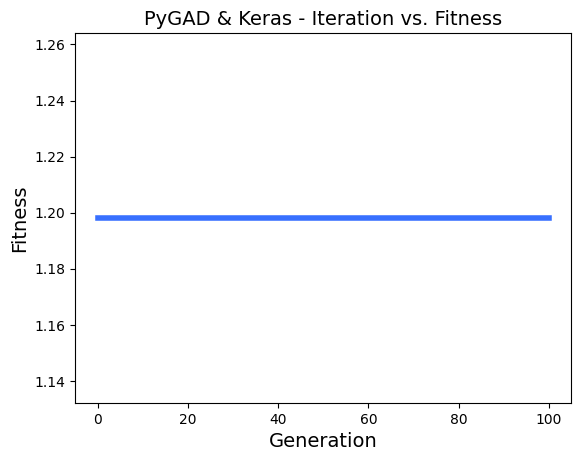

15/15 [==============================] - 0s 1ms/step
Fitness value of the best solution = 1.1981363013325284
Index of the best solution : 0
15/15 [==============================] - 0s 2ms/step
Predictions : 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

In [ ]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad


def fitness_func(instance,solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.00001
    solution_fitness = 1.0 / abs_error

    return solution_fitness


def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

input_layer  = tensorflow.keras.layers.Input(2)
dense_layer1 = tensorflow.keras.layers.Dense(6, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="relu")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = numpy.array(df[['T','P']])


# Data outputs
data_outputs = numpy.array(df['Sgo'])


num_generations = 100
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(df[['T','P']])
print("Predictions : \n", predictions)

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)